# WeatherPy

## Observed trend 1: As expected, the farther we get from the equator, the lower the max temperature experienced.
## Observed trend 2: There does not appear to be any correlation between cloudiness and latitude.
## Observed trend 3: There is a major cluster of high-humidity cities that lie on or near the equator.

In [1]:
# import dependencies

from citipy import citipy
from random import randint
from random import random
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key
import openweathermapy.core as owm
import datetime
import requests
import time

# Generate Cities in City List

In [2]:
# Randomly generage geocoordinnates and store them in a dataframe
list = [[randint(-90, 90)*random(),randint(-180,180)*random()]]
for x in range(1499):
    list.append([randint(-90,90)*random(),randint(-180,180)*random()])

df = pd.DataFrame(list, columns=['Lat', 'Lon'])
df.head()

,Lat,Lon
0,-21.956559,-160.109758
1,38.671473,74.848146
2,-49.095927,14.662361
3,45.967991,61.471812
4,42.218952,20.059529


In [3]:
# Iterate through the dataframe and use the citypy library to convert the coordinates to cities.
# Then append unique cities to a new list.
city_list = []
for index, row in df.iterrows():
    city = citipy.nearest_city(row['Lat'], row['Lon'])
    if (city.city_name not in city_list):
        city_list.append(city.city_name)
iterations = len(city_list)
print(iterations)
print(city_list)

762
['avarua', 'kashi', 'hermanus', 'kazalinsk', 'fierze', 'tabou', 'bengkulu', 'georgetown', 'japura', 'ballina', 'riaba', 'rikitea', 'carnarvon', 'nouna', 'faya', 'port-gentil', 'formosa', 'caravelas', 'roald', 'jamestown', 'padang', 'longyearbyen', 'abha', 'camacupa', 'walvis bay', 'cape town', 'mrirt', 'busselton', 'rantauprapat', 'yenagoa', 'codrington', 'agadez', 'dakar', 'sambava', 'ushuaia', 'the valley', 'semporna', 'tsihombe', 'grand river south east', 'daxian', 'tuktoyaktuk', 'port elizabeth', 'itaituba', 'oriximina', 'kieta', 'sidi ali', 'tarudant', 'puerto ayora', 'oktyabrskoye', 'nouadhibou', 'barentsburg', 'burica', 'mao', 'mahon', 'aksu', 'tias', 'goderich', 'olafsvik', 'praia da vitoria', 'taoudenni', 'arraial do cabo', 'sao filipe', 'sorong', 'luderitz', 'rosa zarate', 'indaparapeo', 'rehoboth', 'praia', 'kavieng', 'barawe', 'panjab', 'sainte-suzanne', 'malakal', 'litoral del san juan', 'pala', 'morondava', 'sungaipenuh', 'rabat', 'north augusta', 'harper', 'kloulklub

# Perform API calls

In [4]:
# create empty lists for the variables we wish to collect as well as declares a counter

count = 1
lat = []
lon = []
humidity = []
temp = []
cloudiness = []
wind = []
bad_city_list = []
good_city_list = []

# generate the api call and gather data, looping through each city stored in the city list, skipping any cities without any data.
# pause the loop for 1 second between each api call to keep from generating too many requests and getting errors.
print("Beginning of Data Retrieval")
print("---------------------------")

for city in city_list:
    url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key + "&q=" + city + "&units=imperial"
    query_url = url.replace(" ", "+")
    try:
        # Get current weather
        current_weather = requests.get(query_url).json()
        lat.append(current_weather['coord']['lat'])
        lon.append(current_weather['coord']['lon'])
        temp.append(current_weather['main']['temp_max'])
        humidity.append(current_weather['main']['humidity'])
        cloudiness.append(current_weather['clouds']['all'])
        wind.append(current_weather['wind']['speed'])
        good_city_list.append(current_weather['name'] + ", " + current_weather['sys']['country'])
        print(f'Processing Record {count}|{current_weather["name"]}:')
        print(f'{query_url.replace(" ", "+")}')
        time.sleep(1)
        count +=1
    except:
        continue
print("---------------------------")
print("End of Data Retrieval")
print("---------------------------")

Beginning of Data Retrieval
---------------------------
Processing Record 1|Avarua:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=avarua&units=imperial
Processing Record 2|Hermanus:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hermanus&units=imperial
Processing Record 3|Tabou:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tabou&units=imperial
Processing Record 4|Georgetown:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=georgetown&units=imperial
Processing Record 5|Japura:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=japura&units=imperial
Processing Record 6|Ballina:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ballina&units=imperial
Processing Record 7|Rikitea:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0

Processing Record 58|Sainte-Suzanne:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sainte-suzanne&units=imperial
Processing Record 59|Pala:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pala&units=imperial
Processing Record 60|Morondava:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=morondava&units=imperial
Processing Record 61|Sungaipenuh:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sungaipenuh&units=imperial
Processing Record 62|Rabat:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rabat&units=imperial
Processing Record 63|North Augusta:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=north+augusta&units=imperial
Processing Record 64|Harper:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=harper&un

Processing Record 116|Olinda:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=olinda&units=imperial
Processing Record 117|Sassandra:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sassandra&units=imperial
Processing Record 118|Aiquile:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=aiquile&units=imperial
Processing Record 119|Sandwick:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sandwick&units=imperial
Processing Record 120|Mabaruma:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mabaruma&units=imperial
Processing Record 121|Riesa:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=riesa&units=imperial
Processing Record 122|Mokolo:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mokolo&units=imperial
Proces

Processing Record 174|Sumbe:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sumbe&units=imperial
Processing Record 175|Ugoofaaru:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ugoofaaru&units=imperial
Processing Record 176|Abalak:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=abalak&units=imperial
Processing Record 177|Ponta do Sol:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ponta+do+sol&units=imperial
Processing Record 178|Pergamino:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pergamino&units=imperial
Processing Record 179|Issia:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=issia&units=imperial
Processing Record 180|Hithadhoo:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hithadhoo&units=imp

Processing Record 231|Qandala:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=qandala&units=imperial
Processing Record 232|Gao:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gao&units=imperial
Processing Record 233|Loandjili:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=loandjili&units=imperial
Processing Record 234|Samarinda:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=samarinda&units=imperial
Processing Record 235|Pimenta Bueno:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pimenta+bueno&units=imperial
Processing Record 236|Oistins:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=oistins&units=imperial
Processing Record 237|Constitucion:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=constitucion

Processing Record 288|Puebloviejo:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=puebloviejo&units=imperial
Processing Record 289|Namtsy:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=namtsy&units=imperial
Processing Record 290|Oussouye:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=oussouye&units=imperial
Processing Record 291|Pozo Colorado:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pozo+colorado&units=imperial
Processing Record 292|Porto de Moz:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=porto+de+moz&units=imperial
Processing Record 293|Victoria:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=victoria&units=imperial
Processing Record 294|Kavaratti:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9

Processing Record 346|Caxito:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=caxito&units=imperial
Processing Record 347|Birjand:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=birjand&units=imperial
Processing Record 348|Sidmouth:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sidmouth&units=imperial
Processing Record 349|Huanren:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=huanren&units=imperial
Processing Record 350|Hit:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hit&units=imperial
Processing Record 351|Los Llanos de Aridane:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=los+llanos+de+aridane&units=imperial
Processing Record 352|Cururupu:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cururupu

Processing Record 403|Cockburn Town:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cockburn+town&units=imperial
Processing Record 404|Belmonte:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=belmonte&units=imperial
Processing Record 405|Rocha:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rocha&units=imperial
Processing Record 406|Prado:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=prado&units=imperial
Processing Record 407|Alyangula:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=alyangula&units=imperial
Processing Record 408|Mbala:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mbala&units=imperial
Processing Record 409|Sao Gabriel da Cachoeira:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sao+ga

Processing Record 460|Somerset:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=somerset&units=imperial
Processing Record 461|Buraydah:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=buraydah&units=imperial
Processing Record 462|Along:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=along&units=imperial
Processing Record 463|Kalmunai:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kalmunai&units=imperial
Processing Record 464|Saint-Louis:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-louis&units=imperial
Processing Record 465|Waddan:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=waddan&units=imperial
Processing Record 466|Saint-Francois:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-francois

Processing Record 517|Mangalore:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mangaluru&units=imperial
Processing Record 518|Benguela:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=benguela&units=imperial
Processing Record 519|Riachao do Dantas:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=riachao+do+dantas&units=imperial
Processing Record 520|Kutum:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kutum&units=imperial
Processing Record 521|Cuenca:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cuenca&units=imperial
Processing Record 522|Koutiala:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=koutiala&units=imperial
Processing Record 523|Cape Coast:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cape

Processing Record 575|Markivka:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=markivka&units=imperial
Processing Record 576|Gizo:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gizo&units=imperial
Processing Record 577|Nuuk:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nuuk&units=imperial
Processing Record 578|Puerto del Rosario:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=puerto+del+rosario&units=imperial
Processing Record 579|Gorom-Gorom:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gorom-gorom&units=imperial
Processing Record 580|Dahra:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dahra&units=imperial
Processing Record 581|Gamboula:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gamboula&uni

Processing Record 632|Aquiraz:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=aquiraz&units=imperial
Processing Record 633|Orange Walk:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=orange+walk&units=imperial
Processing Record 634|Suphan Buri:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=suphan+buri&units=imperial
Processing Record 635|Kagadi:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kagadi&units=imperial
Processing Record 636|Terme:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=terme&units=imperial
Processing Record 637|Devils Lake:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=devils+lake&units=imperial
Processing Record 638|Libreville:
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=librevil

In [5]:
#print the length of all of our lists previously generated to verify they are the same length and meet our minimum requirement

print(len(lat))
print(len(lon))
print(len(temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind))
print(len(good_city_list))

669
669
669
669
669
669
669


In [7]:
# Store our lists in a dataframe, display the dataframe, and save the dataframe with the current date in the filename.

weather_df = pd.DataFrame({"City, Country":good_city_list, "Lat":lat, "Lon":lon, "Max Temp":temp,
                          "Humidity":humidity, "Cloudiness":cloudiness, "Wind Speed":wind})
date = datetime.date.today().strftime("%B-%d-%Y")
weather_df.to_csv(f'Weather Analysis {date}.csv')
weather_df.head()

,"City, Country",Cloudiness,Humidity,Lat,Lon,Max Temp,Wind Speed
0,"Avarua, CK",24,100,-21.21,-159.78,78.82,7.96
1,"Hermanus, ZA",8,91,-34.42,19.24,43.72,2.59
2,"Tabou, CI",68,100,4.42,-7.36,81.48,8.97
3,"Georgetown, GY",75,100,6.80,-58.16,75.20,4.70
4,"Japura, ID",88,98,-0.42,102.29,73.11,2.15


# Latitude vs. Temperature Plot

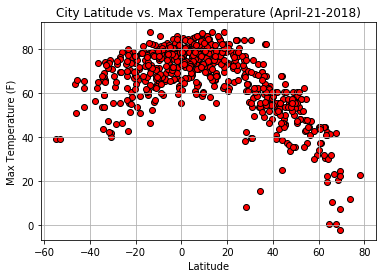

In [25]:
# Scatter plot for temperature vs. latitude and saves the image as a .png file
x_axis = weather_df["Lat"]
y_axis = weather_df["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolor = "black")
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(which='major', axis='both')
plt.savefig(f"City Latitude vs. Max Temperature ({date}).png")

# Latitude vs. Humidity Plot

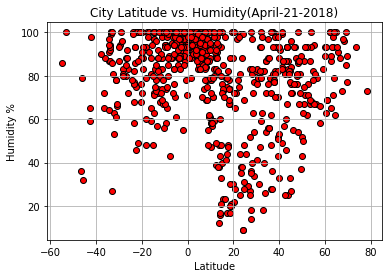

In [24]:
# Scatter plot for humidity vs. latitude and saves the image as a .png file
x_axis = weather_df["Lat"]
y_axis = weather_df["Humidity"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolor = "black")
plt.title(f'City Latitude vs. Humidity({date})')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(which='major', axis='both')
plt.savefig(f'City Latitude vs. Humidity({date}).png')

# Latitude vs. Cloudiness Plot

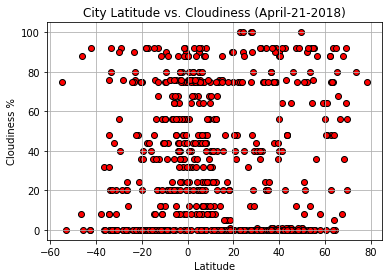

In [23]:
# Scatter plot for cloudiness vs. latitude and saves the image as a .png file
x_axis = weather_df["Lat"]
y_axis = weather_df["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolor = "black")
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(which='major', axis='both')
plt.savefig(f'City Latitude vs. Cloudiness ({date}).png')

# Latitude vs. Wind Speed Plot

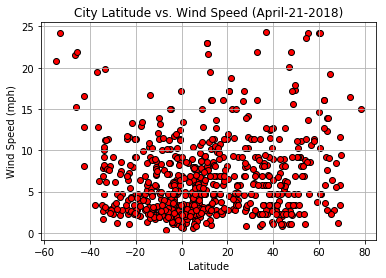

In [22]:
# Scatter plot for wind speed vs latitude and saves the image as a .png file
x_axis = weather_df["Lat"]
y_axis = weather_df["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolor = "black")
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(which='major', axis='both')
plt.savefig(f'City Latitude vs. Wind Speed ({date}).png')